# Ford GoBike System Data
## by Nouf Alotaibi

### Table of Contents
- [Introduction](#Introduction)
- [Preliminary Wrangling](#PreliminaryWrangling)
- [Univariate Exploration](#UnivariateExploration)
- [Bivariate Exploration](#BivariateExploration)
- [Multivariate Exploration](#MultivariateExploration)

## Introduction

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.


<a id='PreliminaryWrangling'></a>
## Preliminary Wrangling

The dataset consist of approximately 1,85M bike trips from FY2018 made in a bike-sharing system covering the greater San Francisco Bay area.

In [2]:
# Importing all the packages

import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather

In [3]:
folder_name = 'baywheels-data'
fordgobike_data = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))], ignore_index = True)

### Assess

In [4]:
fordgobike_data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863716,887,2018-04-01 00:00:08.1630,2018-04-01 00:14:55.5710,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,215.0,34th St at Telegraph Ave,37.822547,-122.266318,1508,Subscriber,Yes
1863717,387,2018-04-01 00:08:06.3670,2018-04-01 00:14:33.9940,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,79.0,7th St at Brannan St,37.773492,-122.403673,629,Subscriber,No
1863718,480,2018-04-01 00:06:21.2810,2018-04-01 00:14:21.4600,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,2070,Customer,No
1863719,503,2018-04-01 00:04:36.8050,2018-04-01 00:13:00.1020,100.0,Bryant St at 15th St,37.767100,-122.410662,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,2556,Subscriber,No


In [5]:
fordgobike_data.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
98400,555,2018-02-02 17:54:20.0860,2018-02-02 18:03:35.5380,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,133.0,Valencia St at 22nd St,37.755213,-122.420975,1406,Subscriber,No
1157458,691,2018-07-12 13:39:35.8670,2018-07-12 13:51:07.2520,213.0,32nd St at Adeline St,37.823847,-122.281193,176.0,MacArthur BART Station,37.828410,-122.266315,705,Subscriber,No
1269823,347,2018-08-24 18:28:49.4470,2018-08-24 18:34:36.8440,176.0,MacArthur BART Station,37.828410,-122.266315,191.0,Market St at 40th St,37.830545,-122.273937,327,Subscriber,No
739072,294,2018-05-11 12:14:13.0210,2018-05-11 12:19:07.1390,212.0,Mosswood Park,37.824931,-122.260479,176.0,MacArthur BART Station,37.828410,-122.266315,3558,Subscriber,No
675412,1232,2018-05-22 17:50:47.6740,2018-05-22 18:11:20.4570,246.0,Berkeley Civic Center,37.869060,-122.270556,155.0,Emeryville Public Market,37.840521,-122.293528,1338,Subscriber,No
923822,31798,2018-12-03 09:16:17.4120,2018-12-03 18:06:16.1410,19.0,Post St at Kearny St,37.788975,-122.403452,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,507,Subscriber,No
879271,296,2018-12-12 16:40:13.7430,2018-12-12 16:45:10.3570,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,16.0,Steuart St at Market St,37.794130,-122.394430,479,Subscriber,No
1709888,383,2018-03-07 19:32:12.3290,2018-03-07 19:38:35.9750,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,36.0,Folsom St at 3rd St,37.783830,-122.398870,1063,Subscriber,No
916126,735,2018-12-05 08:39:48.8390,2018-12-05 08:52:04.5810,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,37.0,2nd St at Folsom St,37.785000,-122.395936,3040,Subscriber,No
1625145,612,2018-03-30 17:31:28.2430,2018-03-30 17:41:40.7210,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,133.0,Valencia St at 22nd St,37.755213,-122.420975,858,Subscriber,No


In [6]:
fordgobike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [7]:
fordgobike_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [8]:
fordgobike_data.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [9]:
fordgobike_data.duplicated().sum()

0

In [10]:
fordgobike_data['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

### Clean

In [11]:
fordgobike_data_copy = fordgobike_data.copy()

In [12]:
# Dropping null values in 'start_station_id'

fordgobike_data_copy.dropna(subset = ['start_station_id'], inplace = True)

In [13]:
# Converting 'start_time' and 'end_time' types to datetime
# Converting 'user_type' type to category

fordgobike_data_copy['start_time'] = pd.to_datetime(fordgobike_data_copy['start_time'])
fordgobike_data_copy['end_time'] = pd.to_datetime(fordgobike_data_copy['end_time'])
fordgobike_data_copy['user_type'] = fordgobike_data_copy['user_type'].astype('category')

In [14]:
# Creating new columns 'duration_min' and 'duration_hr', and converting its types to float

fordgobike_data_copy['duration_min'] = (fordgobike_data_copy['duration_sec'] / 60).astype(float)
fordgobike_data_copy['duration_hr'] = (fordgobike_data_copy['duration_min'] / 60).astype(float)

In [15]:
# Creating new column 'start_date' to extract the date from 'start_time'
# Creating new column 'end_date' to extract the date from 'end_time'

fordgobike_data_copy['start_date'] = pd.to_datetime(fordgobike_data_copy['start_time']).dt.date
fordgobike_data_copy['start_time'] = pd.to_datetime(fordgobike_data_copy['start_time']).dt.time
fordgobike_data_copy['end_date'] = pd.to_datetime(fordgobike_data_copy['end_time']).dt.date
fordgobike_data_copy['end_time'] = pd.to_datetime(fordgobike_data_copy['end_time']).dt.time

In [16]:
# Converting 'start_date' and 'end_date' types to datetime

fordgobike_data_copy['start_date'] = pd.to_datetime(fordgobike_data_copy['start_date'])
fordgobike_data_copy['end_date'] = pd.to_datetime(fordgobike_data_copy['end_date'])

In [17]:
# Creating new column 'month_year' to extract year and month from 'start_date'
# Creating new column 'month' to extract month from 'start_date'
# Creating new column 'month_name' to extract month name from 'start_date'

fordgobike_data_copy['month_year'] = pd.to_datetime(fordgobike_data_copy['start_date']).dt.to_period('M')
fordgobike_data_copy['month'] = fordgobike_data_copy['start_date'].dt.month
fordgobike_data_copy['month_name'] = fordgobike_data_copy['start_date'].dt.strftime('%B')

In [18]:
# Drop uneeded columns

columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
fordgobike_data_copy.drop(columns = columns, inplace = True)

In [19]:
# Reorder columns

column_names = ['duration_sec', 'duration_min', 'duration_hr', 'start_time', 'start_date', 'month_year', 'month', 'month_name', 'end_time',
                'end_date', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 
                'bike_id', 'user_type', 'bike_share_for_all_trip']
fordgobike_data_copy = fordgobike_data_copy.reindex(columns = column_names)

In [20]:
fordgobike_data_copy.to_csv('fordgobike_data_master.csv', encoding = 'utf-8', index=False)

In [21]:
df = pd.read_csv('fordgobike_data_master.csv')

### What is the structure of your dataset?

> The dataset includes 1,851,950 trips with 14 feature: Trip duration, Start time, End time, Start station id, Start station name, Start station latitude, Start station longitude, End station id, End station name, End station latitude, End station longitude, Bike id, User type and Bike share for all trips. 

### What is/are the main feature(s) of interest in your dataset?

> I am interested in exploring:  
> - Average trip duration in seconds/minutes.
> - Monthly usage of Ford GoBike System
> - Distribution of Ford GoBike System users
> - Average trip duration(min) per month
> - Monthly usage of Ford GoBike System per user type
> - Average trip duration(min) per month for Ford GoBike System users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - Start time/Start date 
> - Trip Duration
> - User Type

<a id='UnivariateExploration'></a>
## Univariate Exploration

- **Average Trip Duration in seconds**

An analysis, where we see a distribution of how long these bikes are used by people within seconds.

In [22]:
df['duration_sec'].describe()

count    1.851950e+06
mean     8.529994e+02
std      2.339450e+03
min      6.100000e+01
25%      3.500000e+02
50%      5.550000e+02
75%      8.700000e+02
max      8.636600e+04
Name: duration_sec, dtype: float64

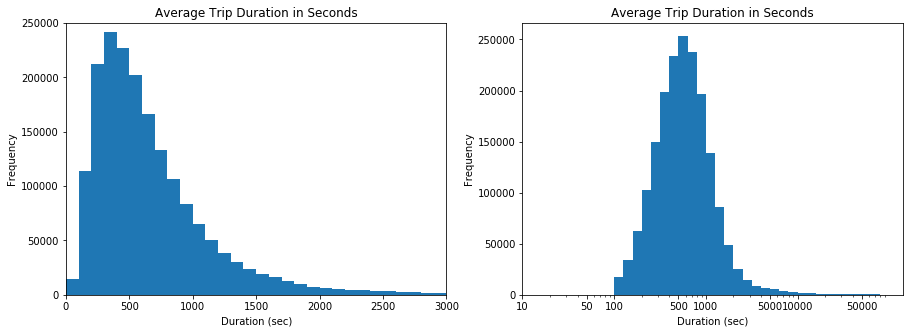

In [23]:
plt.figure(figsize = [15, 5])

# Subplot 1

plt.subplot(1, 2, 1)
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim(0, 3000)
plt.ylim(0, 250000)
plt.title('Average Trip Duration in Seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

# Subplot 2

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(2, 5 + 0.1, 0.1)
ticks = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
lables = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, lables)
plt.title('Average Trip Duration in Seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

> As we can see from subplot (1) is the plot is right-skewed, as a result of a lower boundary in the dataset. Therefore, we need to perform a log transformation to adjust the data. 
>
>In subplot (2), the plot looks more normally distributed. The majority of the trips take approximately 600 seconds. 

- **Average Trip Duration in minutes**

An analysis, where we see a distribution of how long these bikes are used by people within minutes.

In [24]:
df['duration_min'].describe()

count    1.851950e+06
mean     1.421666e+01
std      3.899084e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.250000e+00
75%      1.450000e+01
max      1.439433e+03
Name: duration_min, dtype: float64

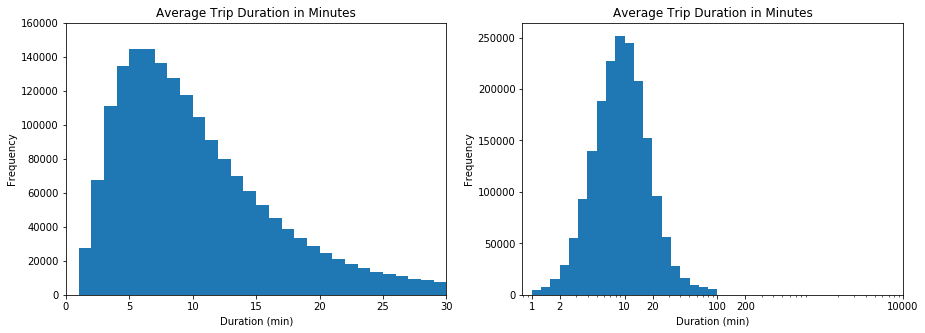

In [25]:
plt.figure(figsize = [15, 5])

# Subplot 1

plt.subplot(1, 2, 1)
bins = np.arange(0, df['duration_min'].max() + 1, 1)
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlim(0, 30)
plt.ylim(0, 160000)
plt.title('Average Trip Duration in Minutes')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency');

# Subplot 2

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(0, 2 + 0.1, 0.1)
ticks = [1, 2, 10, 20, 100, 200, 10000]
lables = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, lables)
plt.title('Average Trip Duration in Minutes')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency');

> As we can see from subplot (1) is the plot is right-skewed, as a result of a lower boundary in the dataset. Therefore, we need to perform a log transformation.
>
> In subplot (2), the plot looks more normally distributed, we can see that The majority of the trips take less than 15 minutes.

- **Monthly usage of Ford GoBike System**

An analysis, where we see a monthly trend of number of bike trips.

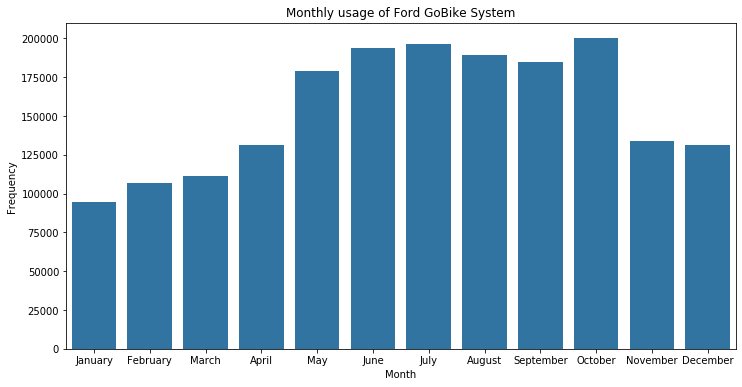

In [26]:
plt.figure(figsize = [12, 6])

base_color = sb.color_palette()[0]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
               'November', 'December']
sb.countplot(data = df, x = 'month_name', color = base_color, order = month_order);
plt.title('Monthly usage of Ford GoBike System');
plt.xlabel('Month');
plt.ylabel('Frequency');

> As we can see from the plot illustrated above, the Ford GoBike system is used mostly in October, July, and June. 

- **Distribution of Ford GoBike System users**

An analysis, where we see a distribution of users who subscribed and who didn't.

In [27]:
subscriber = df['user_type'].value_counts()[0]
customer = df['user_type'].value_counts()[1]

subscriber_prop = subscriber / df.shape[0]
customer_prop = customer / df.shape[0]

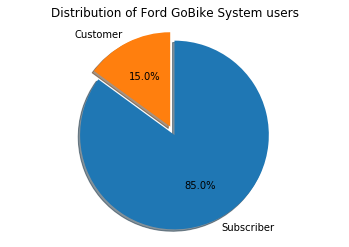

In [28]:
sorted_counts = df['user_type'].value_counts()
proportions = [subscriber_prop, customer_prop]
explode = (0, 0.1)
plt.pie(proportions, explode = (0, 0.1), labels = sorted_counts.index, autopct='%1.1f%%', 
        shadow = True, startangle = 90, counterclock = False);
plt.axis('equal');
plt.title('Distribution of Ford GoBike System users');

> Ford GoBike system certainly has more subscribers (85%) than non-subscribers (15%).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were unusual points while exploring the average duration in seconds/minutes. So, I needed to perform a log transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I had to extract the date from 'start time' while cleaning the data, so I could extract the year and month of the trip. I did this because I wanted to understand the relationship between the month and the duration of the trip.

<a id='BivariateExploration'></a>
## Bivariate Exploration


- **Average Trip Duration(min) per Month**

An analysis, where we see a distribution of how long users take a trip given the month of the year.

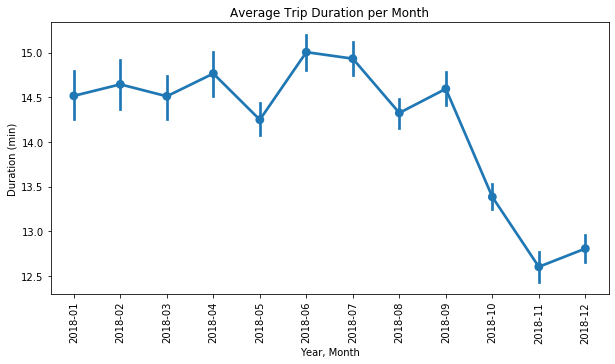

In [29]:
plt.figure(figsize = [10, 5])

sb.pointplot(data = df.sort_values(by = 'month_year'), x = 'month_year', y = 'duration_min');
plt.title('Average Trip Duration per Month');
plt.xlabel('Year, Month');
plt.ylabel('Duration (min)');
plt.xticks(rotation = 90);

> As we can see, the duration of the trips was consistent at the beginning of the year. June and July had the longest trips, while November and December had the shortest trips.

- **Monthly usage of Ford GoBike System per user type**

An analysis, where we see a distribution of how many trips both users take per month.

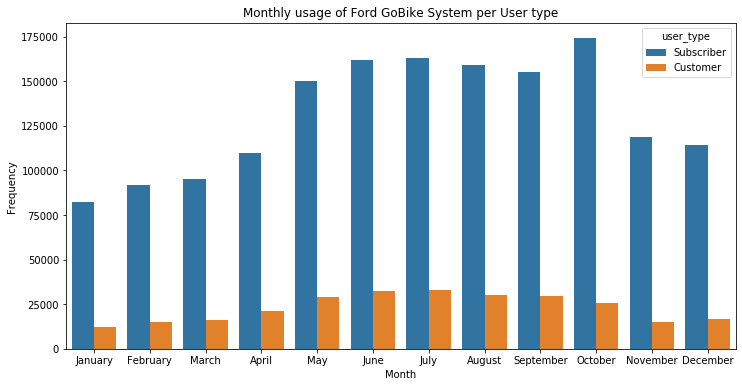

In [30]:
plt.figure(figsize = [12, 6])

ax = sb.countplot(data = df, x = 'month_name', hue = 'user_type', order = month_order)
plt.title('Monthly usage of Ford GoBike System per User type')
plt.xlabel('Month')
plt.ylabel('Frequency');

> As we can see, October is the most frequent month for the subscriber, while For the customer, it is July.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that the duration of the trips has decreased over the last months of the year. Also, the subscriber has more trips than the customer.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I did not observe any interesting relationships between the other features.

<a id='MultivariateExploration'></a>
## Multivariate Exploration

- **Average Trip Duration(min) per Month for Ford GoBike System users**

An analysis, where we see a distribution of how long both users take on a trip per month.

In [ ]:
plt.figure(figsize = [10, 5]);

g = sb.FacetGrid(data = df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month', 'duration_min', alpha = 1/5)
g.add_legend()
plt.title('Average Trip Duration per month for Ford GoBike System users')
plt.xlabel('Month');
plt.ylabel('Duration (min)');

> As we can see from the above plot, the customer has a lot of long trips in duration compared to the subscriber.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We observed how long both users take on a trip per month, and it was found that the Average trip duration spent by customers was longer than subscribers.

### Were there any interesting or surprising interactions between features?

> In the univariate exploration, we found that the Ford GoBike system has more subscribers than customers. The average trip duration spent by customers was, however, longer than subscribers.